## 0. Loading Text and Preprocessing

In [1]:
text = '''
The researchers then isolated 21 bacterial strains from rougui roots to concoct 
an experimental microbial medley, which they called SynCom. They disinfected the 
roots of seedlings of several tea plant varieties, grew them in sterilized 
vermiculite soil for a few weeks, and then inoculated soils with live or dead 
SynCom. They also added a nutrient solution that was either low or high in nitrogen.
'''

In [2]:
import re
def preprocess(raw_string):
    #raw_string = raw_string.lower()
    text = re.sub(r'[^A-Za-z0-9 ]+',' ',raw_string) # remove punctuations
    text = re.sub('\s+',' ',text)                   # remove whitespaces
    text = re.sub(r'\n','',text)                    # remove line breaks
    text = re.sub(r'\d+','',text)                   # remove digit
    return text
text = preprocess(text)

In [3]:
print(text.split())

['The', 'researchers', 'then', 'isolated', 'bacterial', 'strains', 'from', 'rougui', 'roots', 'to', 'concoct', 'an', 'experimental', 'microbial', 'medley', 'which', 'they', 'called', 'SynCom', 'They', 'disinfected', 'the', 'roots', 'of', 'seedlings', 'of', 'several', 'tea', 'plant', 'varieties', 'grew', 'them', 'in', 'sterilized', 'vermiculite', 'soil', 'for', 'a', 'few', 'weeks', 'and', 'then', 'inoculated', 'soils', 'with', 'live', 'or', 'dead', 'SynCom', 'They', 'also', 'added', 'a', 'nutrient', 'solution', 'that', 'was', 'either', 'low', 'or', 'high', 'in', 'nitrogen']


## Embedding Techniques

#### 1.0 Integer Encoding


`LabelEncoder` is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1 :<br>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(text.split())
print(integer_encoded)

[ 1 32 46 22  8 41 17 34 33 48 10  6 14 26 25 53 47  9  0  2 12 44 33 29
 35 29 36 42 31 49 18 45 20 40 50 37 16  3 15 52  7 46 21 38 54 23 30 11
  0  2  5  4  3 28 39 43 51 13 24 30 19 20 27]


In [5]:
len(integer_encoded)

63

#### 1.1 One-hot Encoding

`OneHotEncoder`: Encode categorical features as a one-hot numeric array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter).<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [6]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoder)

  (0, 1)	1.0
  (1, 32)	1.0
  (2, 46)	1.0
  (3, 22)	1.0
  (4, 8)	1.0
  (5, 41)	1.0
  (6, 17)	1.0
  (7, 34)	1.0
  (8, 33)	1.0
  (9, 48)	1.0
  (10, 10)	1.0
  (11, 6)	1.0
  (12, 14)	1.0
  (13, 26)	1.0
  (14, 25)	1.0
  (15, 53)	1.0
  (16, 47)	1.0
  (17, 9)	1.0
  (18, 0)	1.0
  (19, 2)	1.0
  (20, 12)	1.0
  (21, 44)	1.0
  (22, 33)	1.0
  (23, 29)	1.0
  (24, 35)	1.0
  :	:
  (38, 15)	1.0
  (39, 52)	1.0
  (40, 7)	1.0
  (41, 46)	1.0
  (42, 21)	1.0
  (43, 38)	1.0
  (44, 54)	1.0
  (45, 23)	1.0
  (46, 30)	1.0
  (47, 11)	1.0
  (48, 0)	1.0
  (49, 2)	1.0
  (50, 5)	1.0
  (51, 4)	1.0
  (52, 3)	1.0
  (53, 28)	1.0
  (54, 39)	1.0
  (55, 43)	1.0
  (56, 51)	1.0
  (57, 13)	1.0
  (58, 24)	1.0
  (59, 30)	1.0
  (60, 19)	1.0
  (61, 20)	1.0
  (62, 27)	1.0


#### 2.0 Bag of Words

The key
idea behind it is as follows: represent the text under consideration as a bag (collec‐
tion) of words while ignoring the order and context. The basic intuition behind it is
that it assumes that the text belonging to a given class in the dataset is characterized
by a unique set of words. If two text pieces have nearly the same words, then they
belong to the same bag (class). Thus, by analyzing the words present in a piece of text,
one can identify the class (bag) it belongs to.

`Count Vectorizer`: Convert a collection of text documents to a matrix of token counts.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [7]:
documents = [
'The researchers then isolated 21 bacterial strains from rougui roots to concoct', 
'an experimental microbial medley, which they called SynCom. They disinfected the', 
'roots of seedlings of several tea plant varieties, grew them in sterilized', 
'vermiculite soil for a few weeks, and then inoculated soils with live or dead', 
'SynCom. They also added a nutrient solution that was either low or high in nitrogen.',
]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

print(x.toarray())
print(f'Feature names (vocabulary) :\n{feature_names}')

[[1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
  0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 2 0 1 0 1 0 1 1 0 0
  0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
  0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0
  1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0]]
Feature names (vocabulary) :
['21' 'added' 'also' 'an' 'and' 'bacterial' 'called' 'concoct' 'dead'
 'disinfected' 'either' 'experimental' 'few' 'for' 'from' 'grew' 'high'
 'in' 'inoculated' 'isolated' 'live' 'low' 'medley' 'microbial' 'nitrogen'
 'nutrient' 'of' 'or' 'plant' 'researchers' 'roots' 'rougui' 'seedlings'
 'several' 'soil' 'soils' 'solution' 'sterilized' 'strains' 'syncom' 'tea'
 'that' 'the' 'them' 'then' 'they' 'to' 'varieties

#### 2.1 N-gram

All the representation schemes we’ve seen so far treat words as independent units.
There is no notion of phrases or word ordering. The bag-of-n-grams (BoN) approach
tries to remedy this. It does so by breaking text into chunks of n contiguous words (or
tokens). This can help us capture some context, which earlier approaches could not
do. Each chunk is called an n-gram. The corpus vocabulary, V, is then nothing but a
collection of all unique n-grams across the text corpus. Then, each document in the
corpus is represented by a vector of length |V|. This vector simply contains the fre‐
quency counts of n-grams present in the document and zero for the n-grams that are
not present

In [9]:
#n-gram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,3))
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(documents)

In [10]:
#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)
#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["grew them in sterilized vermiculite soil for a few weeks"])
print("grew them in sterilized vermiculite soil for a few weeks:", temp.toarray())


Our vocabulary:  {'the': 123, 'researchers': 83, 'then': 129, 'isolated': 52, '21': 0, 'bacterial': 15, 'strains': 110, 'from': 37, 'rougui': 91, 'roots': 86, 'to': 141, 'concoct': 21, 'the researchers': 124, 'researchers then': 84, 'then isolated': 132, 'isolated 21': 53, '21 bacterial': 1, 'bacterial strains': 16, 'strains from': 111, 'from rougui': 38, 'rougui roots': 92, 'roots to': 89, 'to concoct': 142, 'the researchers then': 125, 'researchers then isolated': 85, 'then isolated 21': 133, 'isolated 21 bacterial': 54, '21 bacterial strains': 2, 'bacterial strains from': 17, 'strains from rougui': 112, 'from rougui roots': 39, 'rougui roots to': 93, 'roots to concoct': 90, 'an': 9, 'experimental': 28, 'microbial': 64, 'medley': 61, 'which': 155, 'they': 134, 'called': 18, 'syncom': 113, 'disinfected': 23, 'an experimental': 10, 'experimental microbial': 29, 'microbial medley': 65, 'medley which': 62, 'which they': 156, 'they called': 137, 'called syncom': 19, 'syncom they': 114, 't

#### 3.0 TF-IDF

- `Term Frequency (TF)` : Term Frequency measures how often a term (word) appears in a document. 
<br><br>
- `Inverse Document Frequency (IDF)` : Inverse Document Frequency measures the importance of a term across a collection of documents. 

In [11]:
documents = [
'The researchers then isolated 21 bacterial strains from rougui roots to concoct', 
'an experimental microbial medley, which they called SynCom. They disinfected the', 
'roots of seedlings of several tea plant varieties, grew them in sterilized', 
'vermiculite soil for a few weeks, and then inoculated soils with live or dead', 
'SynCom. They also added a nutrient solution that was either low or high in nitrogen.',
]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(documents)
print(f'Tfidf Representation matrix :\n{tfidf.idf_}') #IDF for all words in the vocabulary
print(f'\nFeature names :\n{tfidf.get_feature_names_out()}') #All words in the vocabulary.
temp = tfidf.transform(["grew them in sterilized vermiculite soil for a few weeks"])
print(f"\nTfidf representation for 'grew them in sterilized vermiculite soil for a few weeks':\n{temp.toarray()}")

Tfidf Representation matrix :
[2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 1.69314718
 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 1.69314718 2.09861229 2.09861229
 1.69314718 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 1.69314718 2.09861229 2.09861229
 1.69314718 2.09861229 1.69314718 1.69314718 2.09861229 2.09861229
 2.09861229 2.09861229 2.09861229 2.09861229 2.09861229]

Feature names :
['21' 'added' 'also' 'an' 'and' 'bacterial' 'called' 'concoct' 'dead'
 'disinfected' 'either' 'experimental' 'few' 'for' 'from' 'grew' 'high'
 'in' 'inoculated' 'isolated' 'live' 'low' 'medley' 'microbial' 'nitrogen'
 'nutrient' 'of' 'or' 'plant' 'researchers' 'roots' 'rougui' 'seedlings'
 'several' 'soil' 'soils' 'solution' 'sterilized' 'strains' 'syncom' '

## Neural Approach

### 4.1 Word2Vec

Word2Vec is a neural approach for generating word embeddings. It belongs to the family of neural word embedding techniques and specifically falls under the category of distributed representation models.

##### 4.1.1 Continuous Bag of Words(CBOW)

CBOW is a feedforward neural network with a single hidden layer. The input layer represents the context words, and the output layer represents the target word. The hidden layer contains the learned continuous vector representations (word embeddings) of the input words.<br>
The hidden layer contains the continuous vector representations (word embeddings) of the input words.
- The weights between the input layer and the hidden layer are learned during training.
- The dimensionality of the hidden layer represents the size of the word embeddings (the continuous vector space).

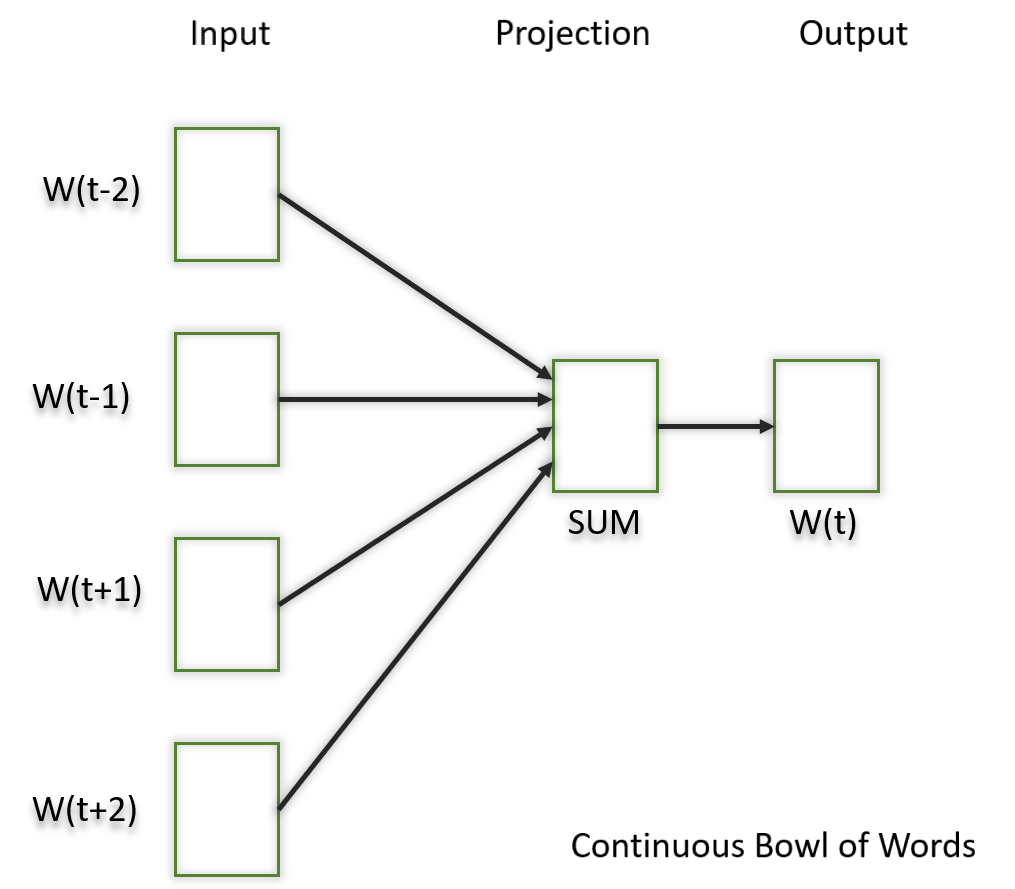

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

In [14]:
text = 'This is a tutorial on implementing Continuous bag of words in Pytorch'

**Sample Data :**

In [15]:
import numpy as np

In [16]:
context_size = 2
tokens = text.lower().split()
vocab = np.unique(np.array(tokens)).tolist()
word_to_index = {word: i for i,word in enumerate(vocab)}
print(word_to_index)

{'a': 0, 'bag': 1, 'continuous': 2, 'implementing': 3, 'in': 4, 'is': 5, 'of': 6, 'on': 7, 'pytorch': 8, 'this': 9, 'tutorial': 10, 'words': 11}


In [17]:
print(len(tokens),len(vocab))

12 12


**Obtaining context and target words :**

In [18]:
data = []
for i in range(2,len(tokens)-2):    
   print(f'Target word : {tokens[i]} --> {word_to_index[tokens[i]]}')
   print(f'Context words : {tokens[i-2:i] + tokens[i+1:i+3]} --> {[word_to_index[word] for word in tokens[i-2:i] + tokens[i+1:i+3]]}\n')

Target word : a --> 0
Context words : ['this', 'is', 'tutorial', 'on'] --> [9, 5, 10, 7]

Target word : tutorial --> 10
Context words : ['is', 'a', 'on', 'implementing'] --> [5, 0, 7, 3]

Target word : on --> 7
Context words : ['a', 'tutorial', 'implementing', 'continuous'] --> [0, 10, 3, 2]

Target word : implementing --> 3
Context words : ['tutorial', 'on', 'continuous', 'bag'] --> [10, 7, 2, 1]

Target word : continuous --> 2
Context words : ['on', 'implementing', 'bag', 'of'] --> [7, 3, 1, 6]

Target word : bag --> 1
Context words : ['implementing', 'continuous', 'of', 'words'] --> [3, 2, 6, 11]

Target word : of --> 6
Context words : ['continuous', 'bag', 'words', 'in'] --> [2, 1, 11, 4]

Target word : words --> 11
Context words : ['bag', 'of', 'in', 'pytorch'] --> [1, 6, 4, 8]



In [19]:
X = list()
y = list()
for i in range(2,len(tokens)-2):    
    context = [word_to_index[word] for word in tokens[i-2:i] + tokens[i+1:i+3]]
    target = word_to_index[tokens[i]]
    X.append(context)
    y.append(target)

In [20]:
X,y

([[9, 5, 10, 7],
  [5, 0, 7, 3],
  [0, 10, 3, 2],
  [10, 7, 2, 1],
  [7, 3, 1, 6],
  [3, 2, 6, 11],
  [2, 1, 11, 4],
  [1, 6, 4, 8]],
 [0, 10, 7, 3, 2, 1, 6, 11])

In [21]:
X = torch.tensor(X)
y = torch.tensor(y)

**Hyperparameters :**

In [22]:
vocab_size = len(vocab)
embed_size = 10
learning_rate = 0.01
epochs = 1000

**Defining Model :**

In [23]:
class CbowModel(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(CbowModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_size)
        self.linear = nn.Linear(embed_size,vocab_size)
        
    def forward(self, inputs):
        
        # Inputs: batch_size x context x2
        # Let context window be 2 so inputs: (batch_size x 4)
        embedding = self.embeddings(inputs)  # embeddings: batch_size x (4) x embedding size
        embedding = embedding.mean(1)        # embeddings: batch_size x (1) x embedding size 
        embedding = embedding.squeeze(1)     # embeddings: batch_size x embedding_size
        output = self.linear(embedding) 
        return output

**Initializing CBOW Model :**

In [24]:
cbow_model = CbowModel(vocab_size, embed_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cbow_model.parameters(), lr=learning_rate)
 

**Training Loop:**

In [25]:
for epoch in range(epochs):
    cbow_model.train()
    optimizer.zero_grad()
    y_pred = cbow_model(X)
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'epoch : {epoch +1} | loss : {loss.item():.4f}')

epoch : 100 | loss : 0.0936
epoch : 200 | loss : 0.0167
epoch : 300 | loss : 0.0073
epoch : 400 | loss : 0.0042
epoch : 500 | loss : 0.0028
epoch : 600 | loss : 0.0020
epoch : 700 | loss : 0.0015
epoch : 800 | loss : 0.0011
epoch : 900 | loss : 0.0009
epoch : 1000 | loss : 0.0007


##### Evaluation

In [26]:
word = 'implementing'
wti = word_to_index[word]
wti

3

In [27]:
wti = torch.tensor(wti)

In [28]:
cbow_model.embeddings(wti)

tensor([ 0.9650, -0.9934, -2.3534, -1.0166,  1.6020, -0.9565,  3.5691,  1.1791,
        -2.0656, -1.0529], grad_fn=<EmbeddingBackward0>)